_Lambda School Data Science_

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

## Download data

We’ll work with a dataset of [3 Million Instacart Orders, Open Sourced](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2)!

In [1]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-07-26 14:25:54--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.107.94
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.107.94|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  14.6MB/s    in 14s     

2019-07-26 14:26:09 (14.2 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [2]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [3]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [4]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Join Datasets

## Goal: Reproduce this example

The first two orders for user id 1:

In [5]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*vYGFQCafJtGBBX5mbl0xyw.png'
example = Image(url=url, width=600)

display(example)

## Load data

Here's a list of all six CSV filenames

In [6]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


For each CSV
- Load it with pandas
- Look at the dataframe's shape
- Look at its head (first rows)
- `display(example)`
- Which columns does it have in common with the example we want to reproduce?

### aisles

In [7]:
import pandas as pd
aisles_data = pd.read_csv('/content/instacart_2017_05_01/aisles.csv')
print(aisles_data.shape)
print(aisles_data.head())
print(aisles_data.dtypes)
pd.options.display.max_rows = 20
aisles_data

(134, 2)
   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation
aisle_id     int64
aisle       object
dtype: object


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
5,6,other
6,7,packaged meat
7,8,bakery desserts
8,9,pasta sauce
9,10,kitchen supplies


### departments

In [8]:
import pandas as pd
departments_data = pd.read_csv('/content/instacart_2017_05_01/departments.csv')
print(departments_data.shape)
print(departments_data.head())
print(departments_data.dtypes)
pd.options.display.max_rows = 20
departments_data

(21, 2)
   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol
department_id     int64
department       object
dtype: object


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


### order_products__prior

In [9]:
import pandas as pd
op_prior_data = pd.read_csv('/content/instacart_2017_05_01/order_products__prior.csv')
print(op_prior_data.shape)
print(op_prior_data.head())
print(op_prior_data.dtypes)
pd.options.display.max_rows = 20
op_prior_data

(32434489, 4)
   order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0
order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


### order_products__train

In [10]:
import pandas as pd
op_train_data = pd.read_csv('/content/instacart_2017_05_01/order_products__train.csv')
print(op_train_data.shape)
print(op_train_data.head())
print(op_train_data.dtypes)
pd.options.display.max_rows = 20
op_train_data

(1384617, 4)
   order_id  product_id  add_to_cart_order  reordered
0         1       49302                  1          1
1         1       11109                  2          1
2         1       10246                  3          0
3         1       49683                  4          0
4         1       43633                  5          1
order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1
8,36,39612,1,0
9,36,19660,2,1


### orders

In [11]:
import pandas as pd
orders_data = pd.read_csv('/content/instacart_2017_05_01/orders.csv')
print(orders_data.shape)
print(orders_data.head())
print(orders_data.dtypes)
pd.options.display.max_rows = 20
orders_data

(3421083, 7)
   order_id  user_id  ... order_hour_of_day  days_since_prior_order
0   2539329        1  ...                 8                     NaN
1   2398795        1  ...                 7                    15.0
2    473747        1  ...                12                    21.0
3   2254736        1  ...                 7                    29.0
4    431534        1  ...                15                    28.0

[5 rows x 7 columns]
order_id                    int64
user_id                     int64
eval_set                   object
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
dtype: object


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


### products

In [12]:
import pandas as pd
products_data = pd.read_csv('/content/instacart_2017_05_01/products.csv')
print(products_data.shape)
print(products_data.head())
print(products_data.dtypes)
pd.options.display.max_rows = 20
products_data

(49688, 4)
   product_id  ... department_id
0           1  ...            19
1           2  ...            13
2           3  ...             7
3           4  ...             1
4           5  ...            13

[5 rows x 4 columns]
product_id        int64
product_name     object
aisle_id          int64
department_id     int64
dtype: object


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


## Concatenate order_products__prior and order_products__train

In [13]:
order_products = pd.concat([op_prior_data, op_train_data], ignore_index=True)
order_products

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


## Get a subset of orders — the first two orders for user id 1

From `orders` dataframe:
- user_id
- order_id
- order_number
- order_dow
- order_hour_of_day

In [14]:
columns = ['order_id',	'user_id', 'order_number', 'order_dow',	'order_hour_of_day']
order_subset = orders_data.loc[(orders_data['user_id'] == 1) & (orders_data['order_number'] <= 2), columns]
order_subset

,order_id,user_id,order_number,order_dow,order_hour_of_day
0,2539329,1,1,2,8
1,2398795,1,2,3,7


## Merge dataframes

Merge the subset from `orders` with columns from `order_products`

In [15]:
merge_data = pd.merge(order_subset, order_products[['order_id', 'add_to_cart_order', 'product_id']], how='left', on='order_id' )
merge_data

,order_id,user_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id
0,2539329,1,1,2,8,1,196
1,2539329,1,1,2,8,2,14084
2,2539329,1,1,2,8,3,12427
3,2539329,1,1,2,8,4,26088
4,2539329,1,1,2,8,5,26405
5,2398795,1,2,3,7,1,196
6,2398795,1,2,3,7,2,10258
7,2398795,1,2,3,7,3,12427
8,2398795,1,2,3,7,4,13176
9,2398795,1,2,3,7,5,26088


Merge with columns from `products`

In [16]:
final_data = pd.merge(merge_data, products_data[['product_id', 'product_name']], how='left', on='product_id')
final_data.sort_values(by=['order_number'])

,order_id,user_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id,product_name
0,2539329,1,1,2,8,1,196,Soda
1,2539329,1,1,2,8,2,14084,Organic Unsweetened Vanilla Almond Milk
2,2539329,1,1,2,8,3,12427,Original Beef Jerky
3,2539329,1,1,2,8,4,26088,Aged White Cheddar Popcorn
4,2539329,1,1,2,8,5,26405,XL Pick-A-Size Paper Towel Rolls
5,2398795,1,2,3,7,1,196,Soda
6,2398795,1,2,3,7,2,10258,Pistachios
7,2398795,1,2,3,7,3,12427,Original Beef Jerky
8,2398795,1,2,3,7,4,13176,Bag of Organic Bananas
9,2398795,1,2,3,7,5,26088,Aged White Cheddar Popcorn


# Reshape Datasets

## Why reshape data?

#### Some libraries prefer data in different formats

For example, the Seaborn data visualization library prefers data in "Tidy" format often (but not always).

> "[Seaborn will be most powerful when your datasets have a particular organization.](https://seaborn.pydata.org/introduction.html#organizing-datasets) This format ia alternately called “long-form” or “tidy” data and is described in detail by Hadley Wickham. The rules can be simply stated:

> - Each variable is a column
- Each observation is a row

> A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

#### Data science is often about putting square pegs in round holes

Here's an inspiring [video clip from _Apollo 13_](https://www.youtube.com/watch?v=ry55--J4_VQ): “Invent a way to put a square peg in a round hole.” It's a good metaphor for data wrangling!

## Hadley Wickham's Examples

From his paper, [Tidy Data](http://vita.had.co.nz/papers/tidy-data.html)

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

"Table 1 provides some data about an imaginary experiment in a format commonly seen in the wild. 

The table has two columns and three rows, and both rows and columns are labelled."

In [18]:
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


"There are many ways to structure the same underlying data. 

Table 2 shows the same data as Table 1, but the rows and columns have been transposed. The data is the same, but the layout is different."

In [19]:
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


"Table 3 reorganises Table 1 to make the values, variables and obserations more clear.

Table 3 is the tidy version of Table 1. Each row represents an observation, the result of one treatment on one person, and each column is a variable."

| name         | trt | result |
|--------------|-----|--------|
| John Smith   | a   | -      |
| Jane Doe     | a   | 16     |
| Mary Johnson | a   | 3      |
| John Smith   | b   | 2      |
| Jane Doe     | b   | 11     |
| Mary Johnson | b   | 1      |

## Table 1 --> Tidy

We can use the pandas `melt` function to reshape Table 1 into Tidy format.

In [20]:
# Transform Table 1 to tidy format
new_table1 = table1.reset_index()
new_table1.rename(columns={'index':'name'}, inplace=True)

final_table1 = pd.melt(new_table1, id_vars=['name'], value_vars=['treatmenta', 'treatmentb'],
       var_name='trt', value_name='result')

final_table1.replace('treatmenta', 'a', inplace=True)
final_table1.replace('treatmentb', 'b', inplace=True)
final_table1

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


In [21]:
# Convert back to Table 1
wide = final_table1.pivot_table(values='result', index='name', columns='trt')
wide

trt,a,b
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


## Table 2 --> Tidy

In [22]:
# Transform Table 2 to tidy format
t_table = table2.T
t_table

new_table2 = t_table.reset_index()
new_table2.rename(columns={'index':'name'}, inplace=True)

final_table2 = pd.melt(new_table2, id_vars=['name'], value_vars=['treatmenta', 'treatmentb'],
       var_name='trt', value_name='result')

final_table2.replace('treatmenta', 'a', inplace=True)
final_table2.replace('treatmentb', 'b', inplace=True)
final_table2

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


## Tidy --> Table 1

The `pivot_table` function is the inverse of `melt`.

In [23]:
# Transform tidy table back to Table 1
final_table1.reset_index()
p_table1 = pd.pivot_table(final_table1, index=['name'], columns=['trt'])

p_table1.rename(columns={'a':'treatmenta', 'b': 'treatmentb'}, inplace=True)
p_table1.rename(columns={'result': ' '}, inplace=True)

p_table1

trt          treatmenta treatmentb
name                              
Jane Doe           16.0       11.0
John Smith          NaN        2.0
Mary Johnson        3.0        1.0

## Tidy --> Table 2

In [24]:
# Transform tidy table back to Table 2
p_table2 = pd.pivot_table(final_table2, index=['trt'], columns=['name'])

p_table2.rename(index={'a':'treatmenta', 'b': 'treatmentb'}, inplace=True)
p_table2.rename(columns={'result': ' '}, inplace=True)

p_table2

name       Jane Doe John Smith Mary Johnson
trt                                        
treatmenta     16.0        NaN          3.0
treatmentb     11.0        2.0          1.0

# Seaborn example

The rules can be simply stated:

- Each variable is a column
- Each observation is a row

A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

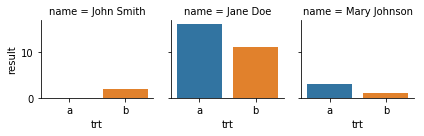

In [25]:
sns.catplot(x='trt', y='result', col='name', kind='bar', data=final_table1, height=2);

## Now with Instacart data

In [0]:
products = pd.read_csv('products.csv')

order_products = pd.concat([pd.read_csv('order_products__prior.csv'), 
                            pd.read_csv('order_products__train.csv')])

orders = pd.read_csv('orders.csv')

## Goal: Reproduce part of this example

Instead of a plot with 50 products, we'll just do two — the first products from each list
- Half And Half Ultra Pasteurized
- Half Baked Frozen Yogurt

In [27]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*wKfV6OV-_1Ipwrl7AjjSuw.png'
example = Image(url=url, width=600)

display(example)

So, given a `product_name` we need to calculate its `order_hour_of_day` pattern.

## Subset and Merge

One challenge of performing a merge on this data is that the `products` and `orders` datasets do not have any common columns that we can merge on. Due to this we will have to use the `order_products` dataset to provide the columns that we will use to perform the merge.

In [28]:
product_names = ['Half And Half Ultra Pasteurized', 'Half Baked Frozen Yogurt']
print(product_names)

products.columns.to_list()

['Half And Half Ultra Pasteurized', 'Half Baked Frozen Yogurt']


['product_id', 'product_name', 'aisle_id', 'department_id']

In [29]:
order_products.columns.to_list()

['order_id', 'product_id', 'add_to_cart_order', 'reordered']

In [30]:
orders.columns.to_list()

['order_id',
 'user_id',
 'eval_set',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order']

In [31]:
merged = (products[['product_id', 'product_name']]
        .merge(order_products[['product_id', 'order_id']])
        .merge(orders[['order_id', 'order_hour_of_day']]))
print(merged.shape)
merged.head()

(33819106, 4)


,product_id,product_name,order_id,order_hour_of_day
0,1,Chocolate Sandwich Cookies,1107,11
1,769,Sliced American Cheese,1107,11
2,6184,Clementines,1107,11
3,8048,Packaged Grape Tomatoes,1107,11
4,9007,Frosted Flakes,1107,11


In [32]:
# condition = ((merged['product_name'] == product_names[0]) | (merged['product_name'] == product_names[1]))
condition = merged['product_name'].isin(product_names)
subset = merged[condition]
print(subset.shape)
subset.head()

(5978, 4)


,product_id,product_name,order_id,order_hour_of_day
25086,30668,Half Baked Frozen Yogurt,595220,21
29409,30668,Half Baked Frozen Yogurt,3252348,16
33914,30668,Half Baked Frozen Yogurt,677455,17
34412,30668,Half Baked Frozen Yogurt,1821824,14
35652,30668,Half Baked Frozen Yogurt,1225489,17


## 4 ways to reshape and plot

### 1. value_counts

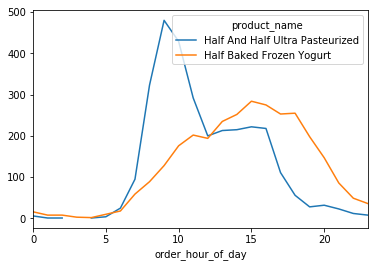

In [33]:
subset.groupby('order_hour_of_day').product_name.value_counts().unstack().plot();

### 2. crosstab

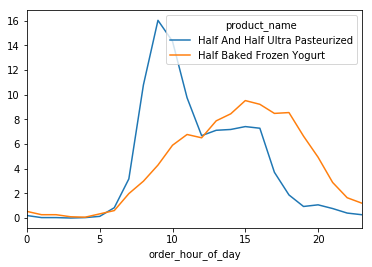

In [34]:
(pd.crosstab(subset['order_hour_of_day'], subset['product_name'], normalize='columns')*100).plot();

### 3. Pivot Table

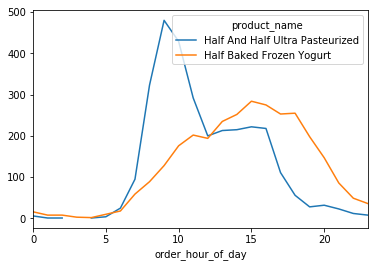

In [35]:
subset.pivot_table(index='order_hour_of_day', columns='product_name', values='order_id', aggfunc=len).plot();

### 4. melt

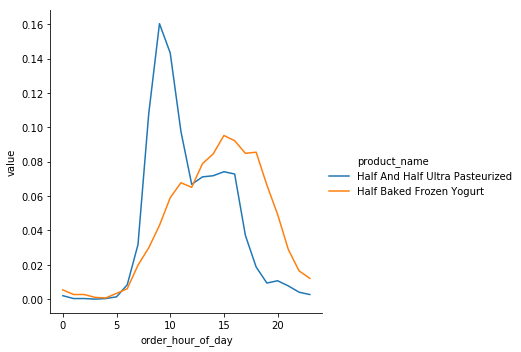

In [36]:
import seaborn as sns

table = pd.crosstab(subset['order_hour_of_day'], subset['product_name'], normalize='columns')
melted = table.reset_index().melt(id_vars='order_hour_of_day')
sns.relplot(x='order_hour_of_day', y='value', hue='product_name', data=melted, kind='line');

# Assignment

## Join Data Section

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

## Reshape Data Section

- Replicate the lesson code
- Complete the code cells we skipped near the beginning of the notebook
- Table 2 --> Tidy
- Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

## Assignment

In [37]:
op_data = pd.merge(order_products, products_data)
op_data

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,26,33120,5,0,Organic Egg Whites,86,16
2,120,33120,13,0,Organic Egg Whites,86,16
3,327,33120,5,1,Organic Egg Whites,86,16
4,390,33120,28,1,Organic Egg Whites,86,16
5,537,33120,2,1,Organic Egg Whites,86,16
6,582,33120,7,1,Organic Egg Whites,86,16
7,608,33120,5,1,Organic Egg Whites,86,16
8,623,33120,1,1,Organic Egg Whites,86,16
9,689,33120,4,1,Organic Egg Whites,86,16


In [38]:
op_data.product_name.value_counts().head(10)

Banana                    491291
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Avocado           184224
Large Lemon               160792
Strawberries              149445
Limes                     146660
Organic Whole Milk        142813
Name: product_name, dtype: int64

In [39]:
flights = sns.load_dataset('flights')
print(flights.shape)
print(flights.head())
print(flights.dtypes)
pd.options.display.max_rows = 20
flights

(144, 3)
   year     month  passengers
0  1949   January         112
1  1949  February         118
2  1949     March         132
3  1949     April         129
4  1949       May         121
year             int64
month         category
passengers       int64
dtype: object


,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
5,1949,June,135
6,1949,July,148
7,1949,August,148
8,1949,September,136
9,1949,October,119


In [40]:
# Pivot table
flight_pivot = pd.pivot_table(flights, index=['year'], columns=['month'])
flight_pivot


passengers                       ...                                    
month    January February March April  ... September October November December
year                                   ...                                    
1949         112      118   132   129  ...       136     119      104      118
1950         115      126   141   135  ...       158     133      114      140
1951         145      150   178   163  ...       184     162      146      166
1952         171      180   193   181  ...       209     191      172      194
1953         196      196   236   235  ...       237     211      180      201
1954         204      188   235   227  ...       259     229      203      229
1955         242      233   267   269  ...       312     274      237      278
1956         284      277   317   313  ...       355     306      271      306
1957         315      301   356   348  ...       404     347      305      336
1958         340      318   362   348  ...       404     359      310      337
1959         360      342   406   396  ...       463     407      362      405
1960         417      391   419   461  ...       508     461      390      432

[12 rows x 12 columns]

In [41]:
total_val = 0
for i in range(1, 1000):
    if (i % 3 == 0 or i % 5 == 0):
        total_val = total_val + i
print(total_val) 


233168


## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [42]:
# Merge product, order_prodcuts and orders to obtain the base data
merged = (products[['product_id', 'product_name']]
        .merge(order_products[['product_id', 'order_id']])
        .merge(orders[['order_id', 'order_hour_of_day']]))
print(merged.shape)
merged.head()

(33819106, 4)


,product_id,product_name,order_id,order_hour_of_day
0,1,Chocolate Sandwich Cookies,1107,11
1,769,Sliced American Cheese,1107,11
2,6184,Clementines,1107,11
3,8048,Packaged Grape Tomatoes,1107,11
4,9007,Frosted Flakes,1107,11


In [43]:
# Create the top products list from the base data
top_products = pd.DataFrame({'sum': merged.groupby('product_id').size()}) # add a sum column
top_products = top_products.sort_values('sum', ascending=False)           # sort in descending order
top_products = top_products.reset_index()                                 # reset the index
top_products = top_products[(top_products['sum'] > 2900)]                 # take products with > 2900 orders
top_products.tail()

,product_id,sum
2046,38533,2905
2047,21038,2902
2048,44787,2902
2049,35734,2902
2050,2447,2901


In [44]:
# Create the full top products subset by merging the product data with the top products 
tp_subset = merged.loc[merged['product_id'].isin(top_products.product_id)]
tp_subset.head()

,product_id,product_name,order_id,order_hour_of_day
2,6184,Clementines,1107,11
3,8048,Packaged Grape Tomatoes,1107,11
6,12078,Shredded Mexican Blend Cheese,1107,11
7,13176,Bag of Organic Bananas,1107,11
8,16797,Strawberries,1107,11


In [45]:
# For each product how many orders were placed each hour and what % does this represent
product_orders_by_hour = pd.DataFrame({'sum': tp_subset.groupby(['product_id', 'order_hour_of_day']).size()}) # add a sum column
product_orders_by_hour = product_orders_by_hour.reset_index()                                                 # reset the index

product_orders_by_hour['pct'] = product_orders_by_hour.groupby('product_id')['sum'].apply(lambda x: x/x.sum()*100) #  add a pct column
pd.set_option("display.max_rows", 40)
product_orders_by_hour.head(24)

,product_id,order_hour_of_day,sum,pct
0,34,0,23,0.339283
1,34,1,18,0.265526
2,34,2,11,0.162266
3,34,3,5,0.073757
4,34,4,5,0.073757
5,34,5,15,0.221272
6,34,6,57,0.840832
7,34,7,202,2.979791
8,34,8,402,5.930078
9,34,9,509,7.508482


In [46]:
# Calculate the mean hour for each product - sum(order hour x # of orders for hour)/total orders 
mean_hour = pd.DataFrame({'mean_hour': product_orders_by_hour.groupby('product_id').apply(lambda x: sum(x['order_hour_of_day'] * x['sum'])/sum(x['sum']))})
mean_hour = mean_hour.reset_index()
mean_hour.head()

,product_id,mean_hour
0,34,13.511285
1,45,13.398624
2,79,13.502530
3,116,12.516822
4,117,13.392173


In [52]:
# To determine early product list sort the mean hours in ascending order and take the top 25
early_list = mean_hour.sort_values('mean_hour', ascending=True)[:25]
early_list = early_list.merge(products, on='product_id')
early_list.head()

,product_id,mean_hour,product_name,aisle_id,department_id
0,9292,11.767279,Half And Half Ultra Pasteurized,84,16
1,46562,11.898340,Sweet & Salty Nut Granola Bars Peanut,3,19
2,45051,12.004019,Pub Mix,107,19
3,36472,12.049459,Nutri Grain Bars Multi Pack,48,14
4,37710,12.059043,Trail Mix,125,19


In [53]:
# To determine late product list sort the mean hours in descending order and take the top 25
late_list = mean_hour.sort_values('mean_hour', ascending=False)[:25]
late_list = late_list.merge(products, on='product_id')
late_list.head()

,product_id,mean_hour,product_name,aisle_id,department_id
0,30668,14.526986,Half Baked Frozen Yogurt,37,1
1,45541,14.526299,The Tonight Dough™ Ice Cream,37,1
2,45681,14.394912,Americone Dream® Ice Cream,37,1
3,46175,14.388942,Half Baked® Ice Cream,37,1
4,14335,14.373308,Phish Food® Ice Cream,37,1


In [0]:
early_pct = product_orders_by_hour.merge(early_list, on='product_id').sort_values(['mean_hour', 'order_hour_of_day'], ascending=True)

In [0]:
# get list of early product names
early_product_names = list(early_pct['product_name'].unique())
early_product_names = '\n'.join(early_product_names)

In [0]:
late_pct = product_orders_by_hour.merge(late_list, on='product_id').sort_values(['mean_hour', 'order_hour_of_day'], ascending=False)

In [0]:
# get list of late product names
late_product_names = list(late_pct['product_name'].unique())
late_product_names = '\n'.join(late_product_names)


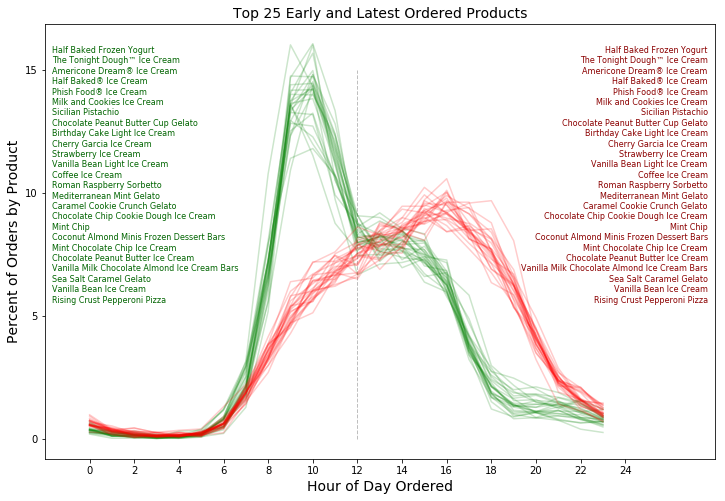

In [61]:
# Plot the results
import matplotlib.pyplot as plt

# Figure Size
fig, ax = plt.subplots(figsize=(12, 8))

# Plot
early_pct.groupby('product_id').plot(x='order_hour_of_day', 
                                         y='pct', 
                                         ax=ax, 
                                         legend=False,
                                         alpha=0.2,
                                         aa=True,
                                         color='green',
                                         linewidth=1.5,)

late_pct.groupby('product_id').plot(x='order_hour_of_day', 
                                         y='pct', 
                                         ax=ax, 
                                         legend=False,
                                         alpha=0.2,
                                         aa=True,
                                         color='red',
                                         linewidth=1.5,)

# Margins
plt.margins(x=0.5, y=0.05)

# Labels
label_font_size = 14
plt.title('Top 25 Early and Latest Ordered Products', fontsize=label_font_size)
plt.xlabel('Hour of Day Ordered', fontsize=label_font_size)
plt.ylabel('Percent of Orders by Product', fontsize=label_font_size)

# Tick Range
tick_font_size = 10
ax.tick_params(labelsize=tick_font_size)
plt.xticks(range(0, 25, 2))
plt.yticks(range(0, 16, 5))
plt.xlim([-2, 28])

# Vertical line at noon
plt.vlines(x=12, ymin=0, ymax=15, alpha=0.5, color='gray', linestyle='dashed', linewidth=1.0)

# Text
text_font_size = 8
ax.text(0.01, 0.95, late_product_names,
        verticalalignment='top', horizontalalignment='left',
        transform=ax.transAxes,
        color='darkgreen', fontsize=text_font_size);

ax.text(0.99, 0.95, late_product_names,
        verticalalignment='top', horizontalalignment='right',
        transform=ax.transAxes,
        color='darkred', fontsize=text_font_size);